In [1]:
import libs.cleaning as cleaning
from importlib import reload

In [2]:
import cv2
import numpy as np
from glob import glob
import libs.render as render
import os
import pandas as pd

In [3]:
images = glob('./data/d59fe403/patches/*.jpg')

In [7]:
from IPython.display import display, clear_output

reload(cleaning)
img = cv2.imread(images[1])
white_img = cleaning.create_white_image(img.shape)

def find_bad_patches(images, comp_img, threshold=0.5):
    bad_patches = []
    counter = 0

    for img in images:
        imgd = cv2.imread(img)
        counter += 1
        if cleaning.is_image_too_specular(imgd, comp_img, threshold):
            img_name = os.path.basename(img)
            bad_patches.append(img_name)
    return bad_patches


bad_patches  = find_bad_patches(images, white_img, threshold=1.0)

'images read: 15974'

In [8]:
print('bad patches: {}'.format(len(bad_patches)))
df = pd.read_csv('./data/d59fe403/patches.csv')
print('before: {}'.format(len(df)))
df_cleaned = df[~df.patch_name.isin(bad_patches)]
print('cleaned: {}'.format(len(df_cleaned)))

bad patches: 295
before: 15975
cleaned: 15680


In [46]:
# save cleaned data
df_cleaned.to_csv('./data/d59fe403/patches_cleaned.csv', index=False)

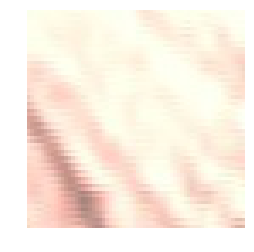

In [44]:
reload(render)
import libs.cleaning as cleaning
reload(cleaning)

img = cv2.imread(os.path.join('./data/d59fe403/patches', bad_patches[50]))
render.flip_and_plot_image(img)

# figure out the histogram: 0 = blue, 1 = green, 2 = red, histSize = 256, range=[0,256]

# find dark images
def filter_images(images):
    candidates = []

    for img in images:
        imgd = cv2.imread(img)
        bch = cleaning.hist_percentage_in_range(imgd, 0, start=0, end=30)
        gch = cleaning.hist_percentage_in_range(imgd, 1, start=0, end=30)
        rch = cleaning.hist_percentage_in_range(imgd, 2, start=0, end=30)
        if (bch + gch + rch) > 2.5:
            candidates.append(img)
        
    return candidates

dark_images = filter_images(images)

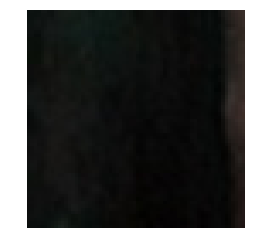

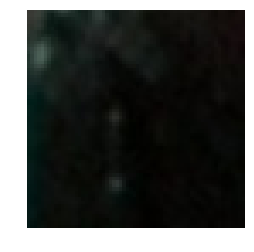

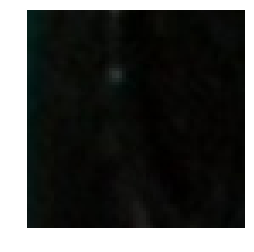

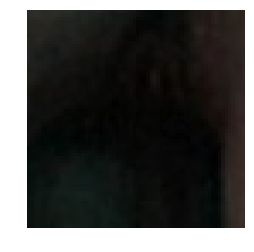

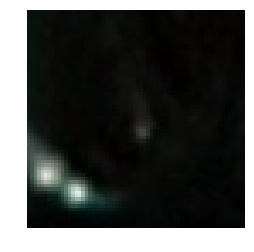

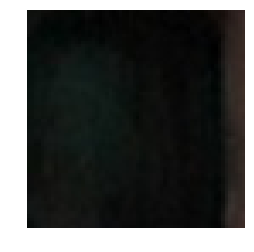

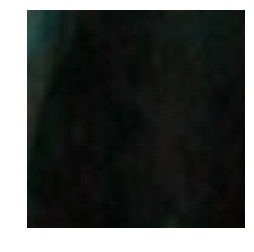

In [47]:


for k in dark_images:
    
    render.flip_and_plot_image(cv2.imread(k))